In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [31]:
df = pd.read_csv('HeartAttack.csv')
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


In [32]:
df.shape

(1319, 9)

In [33]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [34]:
df.duplicated().sum()

0

In [35]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [36]:
columns_to_scale = ['Age', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB']

scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,0.499279,1,-0.239032,1.257215,0.764927,0.178459,-0.290962,0.012,0
1,-2.654832,1,0.303491,-1.117098,-1.872542,1.994344,-0.184072,1.060,1
2,-0.014181,1,-0.277784,1.257215,0.337229,1.647189,-0.286859,0.003,0
3,0.719333,1,-0.161529,-0.274600,-1.230995,1.647189,-0.030324,0.122,1
4,-0.160884,1,-0.277784,-0.580963,-0.518166,2.047752,-0.306509,0.003,0


In [37]:
X = df.drop(columns=['Result']) 
y = df['Result'] 

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

In [39]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [40]:
y_pred = model.predict(x_test) 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy:{accuracy}")
print(f"Precision:{precision}")
print(f"Recall:{recall}")
print(f"F1-Score:{f1}")


Accuracy:0.7660984848484849
Precision:0.8135019635019636
Recall:0.8041130270130976
F1-Score:0.7658698421161765


In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[421,   2],
       [245, 388]], dtype=int64)

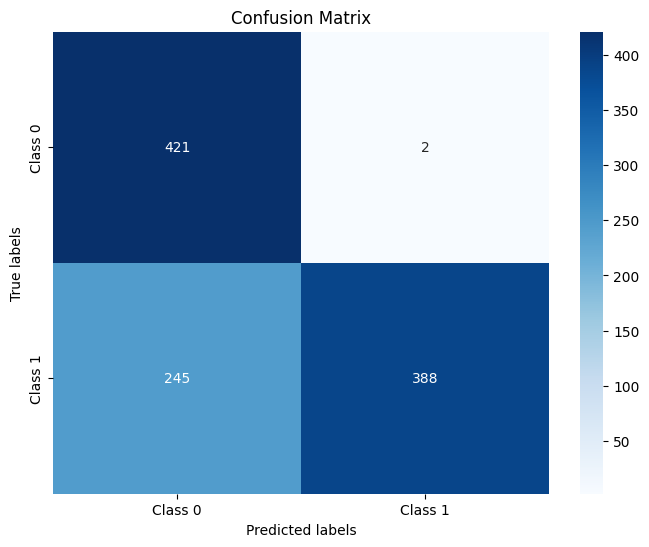

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
